In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.drop(columns="Unnamed: 2",inplace=True)
df.drop(columns="Unnamed: 3",inplace=True)
df.drop(columns="Unnamed: 4",inplace=True)

In [4]:
df.columns = ['labels', "message"]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(5169, 2)

In [9]:
df['labels'].value_counts()

labels
ham     4516
spam     653
Name: count, dtype: int64

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


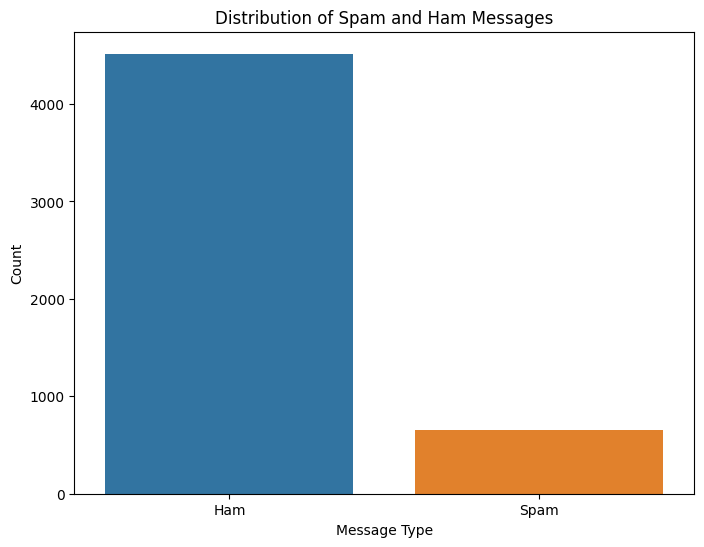

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='labels')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Messages')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [12]:
import re
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in set(stopwords.words('english'))]
    # Join the cleaned words back into a sentence
    cleaned_text = ' '.join(words)
    return cleaned_text

Converting text to lower case 

In [13]:
df_1 = df.copy()
# Create a copy of the 'message' column to avoid SettingWithCopyWarning
df_1['message'] = df_1['message'].apply(lambda x: preprocess_text(x))

In [14]:
df_1['message']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    nd time tried contact u u pound prize claim ea...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message, Length: 5169, dtype: object

In [15]:
df_1['labels'] = df_1['labels'].map({'ham': 0, 'spam': 1})

In [16]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5169 non-null   int64 
 1   message  5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [17]:
X = df_1['message']  
y = df_1['labels']

In [18]:
X

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    nd time tried contact u u pound prize claim ea...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message, Length: 5169, dtype: object

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [20]:
X_train.shape

(4135,)

In [21]:
X_test.shape

(1034,)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df= 1 ,stop_words="english",lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [23]:
X_test_features.shape

(1034, 6531)

In [24]:
X_train_features.shape

(4135, 6531)

In [25]:
y_train

2228    0
5529    0
2149    0
5058    1
5051    0
       ..
4740    0
474     0
3266    0
4016    0
879     1
Name: labels, Length: 4135, dtype: int64

In [26]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [27]:
print(X_train_features)

  (0, 2764)	0.7455593142248959
  (0, 1819)	0.6664392762829205
  (2, 5755)	0.3136674984299076
  (2, 3879)	0.29654379102529516
  (2, 3206)	0.6378379419700079
  (2, 6147)	0.6378379419700079
  (3, 3936)	0.2517768686245632
  (3, 3533)	0.2652803962460295
  (3, 5931)	0.27643356348479015
  (3, 3487)	0.21579968182518874
  (3, 3817)	0.31902574339244416
  (3, 1240)	0.31902574339244416
  (3, 3615)	0.2723488339725236
  (3, 4626)	0.27643356348479015
  (3, 3147)	0.2272545554340615
  (3, 4346)	0.24956088991158282
  (3, 2397)	0.22848542303348354
  (3, 4135)	0.2809999025804762
  (3, 801)	0.24547616039931625
  (3, 6096)	0.23682509179136363
  (3, 2095)	0.16633994066582758
  (4, 3701)	0.14442597006371244
  (4, 1939)	0.25536904087597173
  (4, 5362)	0.2646201851515498
  (4, 4279)	0.2646201851515498
  :	:
  (4132, 1736)	0.735360206961056
  (4132, 4146)	0.46121835586566373
  (4132, 1071)	0.3600533490917621
  (4132, 3879)	0.3418838692283863
  (4133, 5067)	0.37694416029410366
  (4133, 4154)	0.3637661602533273
  

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [29]:
model.fit(X_train_features,y_train)

LogisticRegression()

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
prediction = model.predict(X_test_features)

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_accuracy = accuracy_score(y_test,prediction)*100

In [33]:
model_accuracy

95.74468085106383

In [34]:
conf_matrix = confusion_matrix(y_test,prediction)
class_report = classification_report(y_test, prediction)

In [35]:
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[887   2]
 [ 42 103]]


In [36]:
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       889
           1       0.98      0.71      0.82       145

    accuracy                           0.96      1034
   macro avg       0.97      0.85      0.90      1034
weighted avg       0.96      0.96      0.95      1034



In [37]:
from sklearn.naive_bayes import MultinomialNB


Multimodel = MultinomialNB()
Multimodel.fit(X_train_features,y_train)

MultinomialNB()

In [38]:
multiprediction = Multimodel.predict(X_test_features)

In [39]:
model1_accuracy = accuracy_score(y_test,multiprediction)*100
model1_accuracy

97.00193423597679

In [40]:
conf_matrix = confusion_matrix(y_test,multiprediction)
class_report = classification_report(y_test, multiprediction)

In [41]:
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[889   0]
 [ 31 114]]


In [42]:
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       1.00      0.79      0.88       145

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



MultinomialNB is giving Good results

In [43]:
# Define the input text
input_mail = ["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."]

# Preprocess the input text
input_tfidf = feature_extraction.transform(input_mail)

# Make a prediction
prediction = Multimodel.predict(input_tfidf)

# Interpret the prediction
if prediction[0] == 0:
    result = "Ham"
else:
    result = "Spam"

# Print the result
print(f"Prediction: {result}")


Prediction: Ham


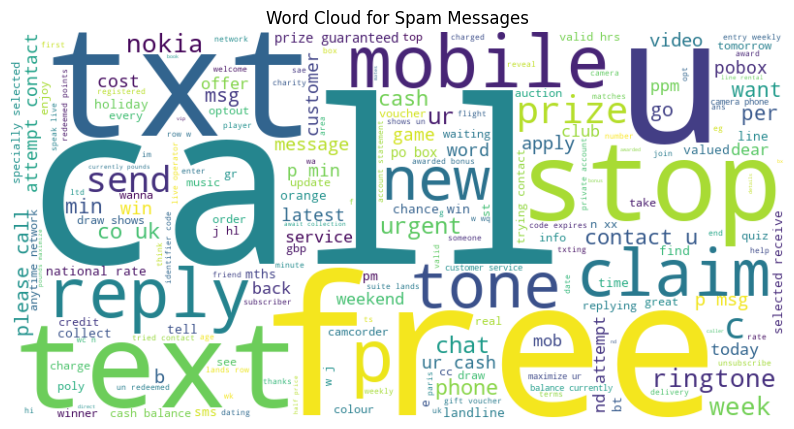

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have already trained your model and have predictions in 'y_pred'
# 'X_test' contains the original text of the test messages

# Combine the predicted labels (0 for ham, 1 for spam) with the test messages
df_results = pd.DataFrame({'message': X_test, 'labels': y_test})

# Filter out the spam messages
spam_messages = df_results[df_results['labels'] == 1]['message']

# Join the spam messages into a single text
spam_text = " ".join(spam_messages)

# Generate a word cloud for spam messages
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Spam Messages")
plt.show()


In [45]:
from joblib import dump, load
dump(model,'SpamFiltering.joblib')

['SpamFiltering.joblib']